Anda sedang merancang sebuah perangkat IoT pintar yang digunakan untuk melakukan penyiraman secara optimasi. Dikarenakan anda tidak mengetahui aturan yang baik untuk melakukan penyiraman, anda menggunakan dataset penelitian terdahulu yang membahas terkait kondisi optimal tersebut. Dalam merancang sistem ini, anda dapat menggunakan 3 sensor :

1. Sensor kelembapan tanah (x1)
- Mengukur seberapa lembab tanah (0-1, Kontinu)
2. Sensor suhu (x2)
- Mengukur suhu permukaan tanah (0-1, Kontinu)
3. Sensor percikan air (x3)
- Jika ada percikan air di permukaan hujan x3 = 1, jika tidak x3 = 0

Sensor kelembapan tanah yang anda gunakan ditanam di dalam tanah sehingga akan terjadi delay sekitar 10 menit sehingga apabila sedang disiram dari sumber eksternal (Hujan, Disiram Manual, dll.) maka harus dideteksi menggunakan sensor percikan air.

Catatan :
1. Tidak diberikan template kode, diperbolehkan mengambil dari praktikum

In [ ]:
train_input = [[0.1, 0.3, 0], [0.7, 0.2, 1], [0.7, 0.8, 0], [0.2, 0.9, 0], [0.1, 0.9, 1], [0.2, 0.3, 1], [0.4, 0.3, 0], [0.5, 0.5, 1]]
train_output = [1, 0, 1, 1, 0, 0, 1, 0]

test_input = [[0.2, 0.4, 0], [0.6, 0.9, 0], [0.9, 0.3, 1]]
test_output = [1, 1, 0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

In [ ]:
def bipstep(y, th=0):
  return 1 if y>= th else 0

In [ ]:
def hebb_fit(train, target, verbose = False, draw = False, draw_padding = 1):
  w = np.zeros(len(train[0]) + 1)
  bias = np.ones((len(train), 1))
  train = np.hstack((bias, train))

  for r, row in enumerate(train):
    w =[w[i] + row[i] * target[r] for i in range(len(row))]

    if verbose:
      print('Bobot: ', w)
    if draw:
      plot(line(w, 0), train, target, draw_padding)

  return w

In [ ]:
def hebb_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y

## Train

Bobot:  [1.0, 0.1, 0.3, 0.0]


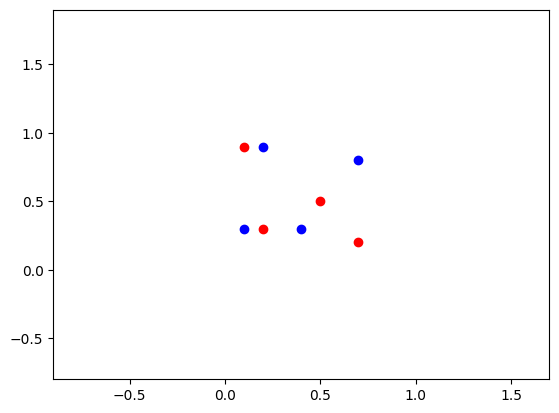

Bobot:  [1.0, 0.1, 0.3, 0.0]


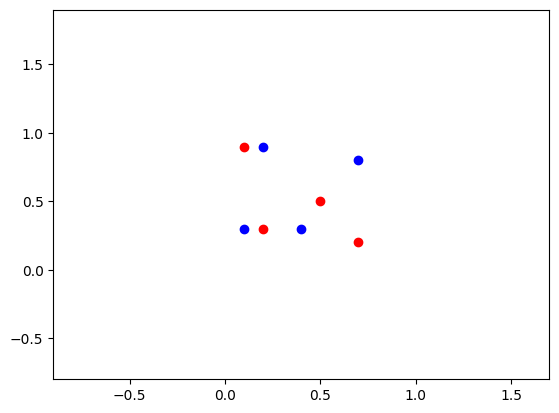

Bobot:  [2.0, 0.7999999999999999, 1.1, 0.0]


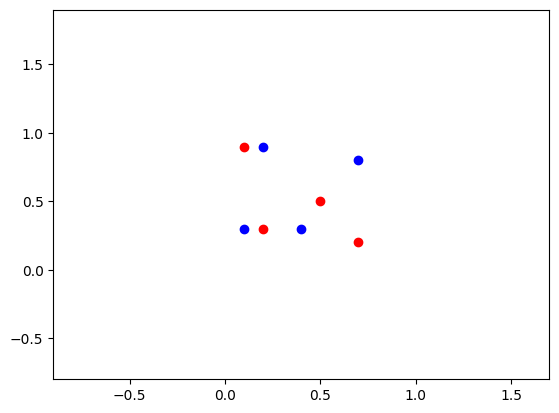

Bobot:  [3.0, 1.0, 2.0, 0.0]


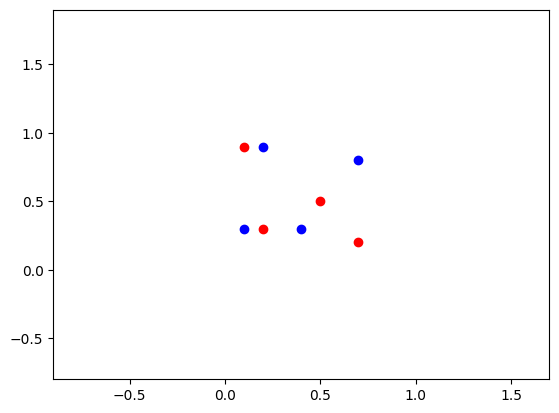

Bobot:  [3.0, 1.0, 2.0, 0.0]


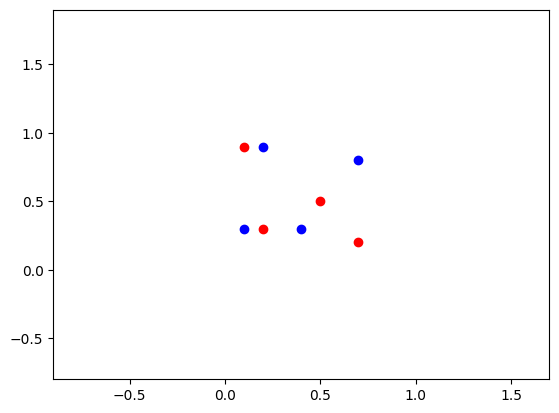

Bobot:  [3.0, 1.0, 2.0, 0.0]


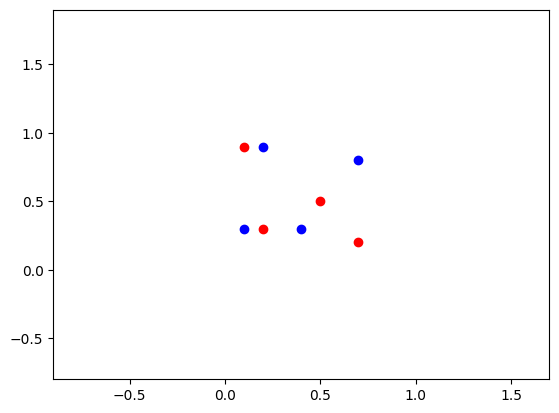

Bobot:  [4.0, 1.4, 2.3, 0.0]


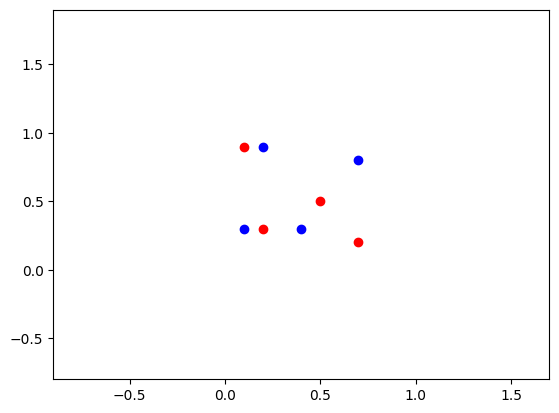

Bobot:  [4.0, 1.4, 2.3, 0.0]


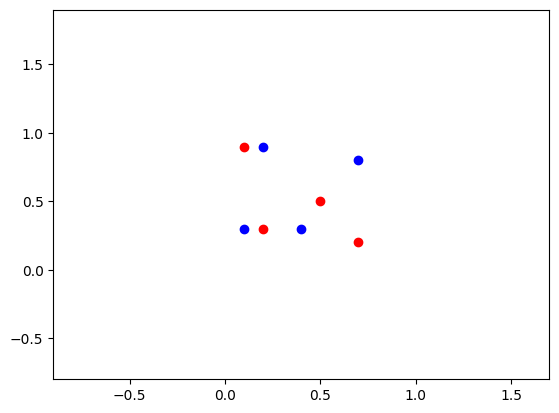

Output:  [1, 1, 1, 1, 1, 1, 1, 1]
Target:  [1, 0, 1, 1, 0, 0, 1, 0]
Akurasi:  0.5


In [ ]:
from sklearn.metrics import accuracy_score

model = hebb_fit(train_input, train_output, verbose = True, draw = True)
output = hebb_predict(train_input, model)
accuracy = accuracy_score(output, train_output)

print('Output: ', output)
print('Target: ', train_output)
print('Akurasi: ', accuracy)

## Testing

Bobot:  [1.0, 0.2, 0.4, 0.0]


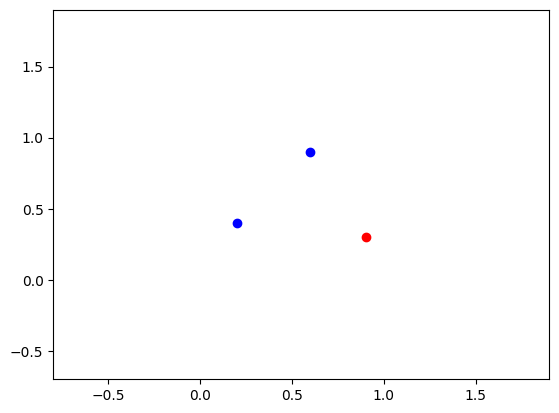

Bobot:  [2.0, 0.8, 1.3, 0.0]


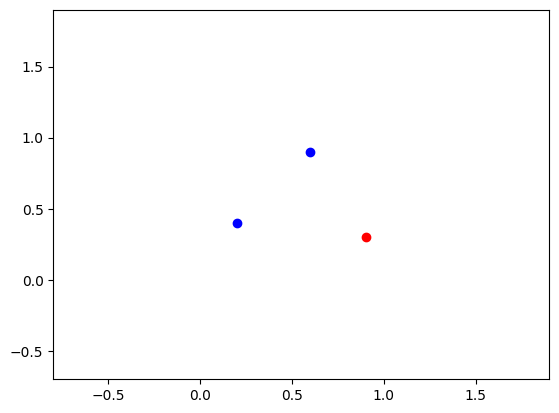

Bobot:  [2.0, 0.8, 1.3, 0.0]


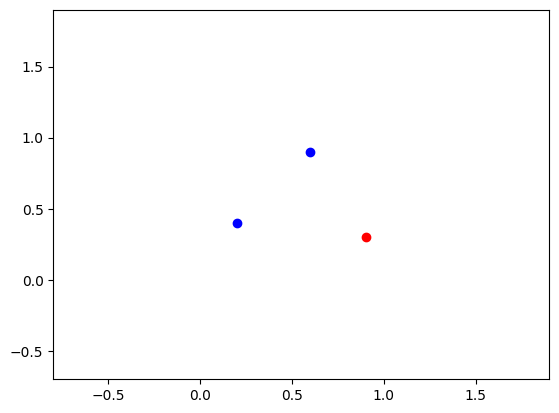

Output:  [1, 1, 1]
Target:  [1, 1, 0]
Akurasi:  0.6666666666666666


In [ ]:
model = hebb_fit(test_input, test_output, verbose = True, draw = True)
output = hebb_predict(test_input, model)
accuracy = accuracy_score(output, test_output)

print('Output: ', output)
print('Target: ', test_output)
print('Akurasi: ', accuracy)

## Analisis

1. Cek akurasi pada data train dan tes, apakah model menunjukkan hasil yang baik?
2. Cek bobot dan analisis korelasi antara hasil pembacaan sensor dengan output dari sensor
3. Analisis hasil akurasi yang didapatkan dan jelaskan mengapa model mampu/tidak mampu mendapatkan akurasi yang optimal


1. Tidak, pada data train, hasil yang didapatkan dengan menggunakan Hebb net adalah [1, 1, 1, 1, 1, 1, 1, 1] dengan akurasi 50%. Sedangkan pada data test, hasil yang didapatkan dengan menggunakan Hebb net adalah [1, 1, 1] dengan akurasi 66%.

2. Korelasi antara hasil output dengan hasil pembacaan sensor adalah semakin besar bobot dari tiap input maka semakin besar relevansinya terhadap output. Sehingga untuk sensor kelembapan tidak terlalu berpengaruh terhadap output, sensor suhu memiliki pengaruh yang signifikan terhadap output, dan terdapat sebuah error pada sensor air sehingga bobot selalu memiliki nilai 0.

3. Hasil akurasi yang didapatkan hanya mencapai 66% sehingga model kurang mampu mendapatkan akurasi yang optimal. Hal ini disebabkan oleh kurangnya pengaruh sensor kelembapan dan suhu sehingga meskipun sensor suhu dan kelembapan tinggi dan sensor air rendah, maka hasilnya akan tetap 0.